# Single-layer Perceptron
<div align='right'> Hoe Sung Ryu ( 류 회 성 ) </div>
<div align='right'> Minsuk Sung ( 성 민 석) </div>

<img src=https://i.ytimg.com/vi/ahF9T7pYy3U/maxresdefault.jpg width=70%>


    
> Author: Hoe Sung Ryu, Minsuk Sung  <p>
> Tel: 010-6636-7275 / skainf23@gamil.com // 010-5134-3621 / minsuksung@korea.ac.kr <p>
> 본 내용은 파이토치를 활용한 딥러닝 과외 자료입니다. 본 내용을 제작자의 동의없이 무단으로 복제하는 행위는 금합니다.
    

---

Syllabus
    
|Event Type|Date|Topic|
|--:|:---:|:---|
|1 |July 27| Environment setting and Python basic|
|2 |July 28| Pytorch basic and Custom Data load |
|3 |July 29| Traditional Machine Learning(1) |
|4 |July 30| Traditional Machine Learning(2) |
|5 |July 31| CNN(Convolutional Neural Network)(1)  |
|6 |Aug 03| CNN(Convolutional NeuralNetwork)(2) |
|7 |Aug 04|  RNN(Recurrent Neural Networks)(1) |
|8 |Aug 05|  RNN(Recurrent Neural Networks)(2) |
|9 |Aug 06|  Transfer learning(VGG pertained on ImageNEt for CIfar-10)| 
|10|Aug 07|**Mini_Kaggle**: Facial Expression Recognition on `AffectNet` | 
|11|Aug 08|`Awards` and `Closing`| 


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Single-layer-Perceptron" data-toc-modified-id="Single-layer-Perceptron-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single-layer Perceptron</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#DatasetLoader" data-toc-modified-id="DatasetLoader-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DatasetLoader</a></span></li><li><span><a href="#Define-the-model" data-toc-modified-id="Define-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Define the model</a></span></li><li><span><a href="#Model-Compile" data-toc-modified-id="Model-Compile-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Compile</a></span></li><li><span><a href="#Loss-and-optimizer" data-toc-modified-id="Loss-and-optimizer-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Loss and optimizer</a></span></li><li><span><a href="#Model-Train-and-Evaluation" data-toc-modified-id="Model-Train-and-Evaluation-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Train and Evaluation</a></span></li><li><span><a href="#Visulization" data-toc-modified-id="Visulization-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Visulization</a></span></li></ul></div>

## Single-layer Perceptron

<img src=https://miro.medium.com/max/1400/1*-uNOPSyB7IOk9inA-brIBg.png width=70%>
<br>
Let’s first observe how the single-layer perceptron model is implemented.
Single-layer perceptron takes data as input and its weights are summed up then an activation function is applied before sent to the output layer.
For the single-layer perceptron model, the `step function` is normally used as an Activtaion function.

However, we will used `sigmoid function` since heavy-side step function is non-differentiable at x = 0 and it has 0 derivatives elsewhere, meaning the gradient descent won’t be able to make a progress in weight updates.
Therefore, step function is not suitable for the neural network.

In [5]:
# import 
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline

In [6]:
# define function
def step_function(x):
    return np.array(x > 0, dtype=np.int) 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

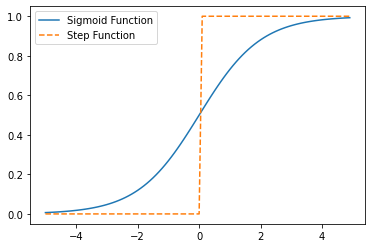

In [7]:
X = np.arange(-5.0, 5.0, 0.1)
Y_sig = sigmoid(X)
Y_step = step_function(X)
plt.plot(X, Y_sig,label='Sigmoid Function')
plt.plot(X, Y_step,linestyle='--',label='Step Function')
plt.legend()
plt.show()

---

<img srcset="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&amp;fname=http%3A%2F%2Fcfile27.uf.tistory.com%2Fimage%2F99C5833D5B3F1FBF0A165B" src="https://t1.daumcdn.net/cfile/tistory/99C5833D5B3F1FBF0A" style="cursor: pointer;max-width:100%;height:auto" width="500" height="314" filename="캡처19.PNG" filemime="image/jpeg">

In [8]:
# Data
from sklearn.datasets import make_blobs

n_samples=1000
n_features=2
X, y = make_blobs(n_samples=n_samples, centers=2, n_features=n_features, random_state=42)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

Class label counts: [500 500]
X.shape: (1000, 2)
y.shape: (1000,)


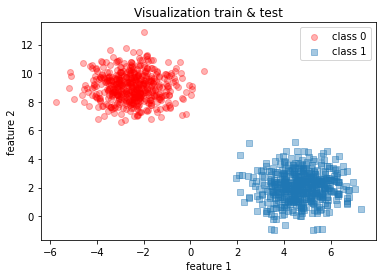

In [10]:
# Visualization with matplotlib
plt.title('Visualization train & test')
plt.scatter(X[y==0,:][:,0], X[y==0,:][:,1], label='class 0', marker='o',color='r', alpha=0.3)
plt.scatter(X[y==1,:][:,0], X[y==1,:][:,1], label='class 1', marker='s', alpha=0.4)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

## Preprocessing 
```
Input: X, y
module: from sklearn.model_selection import train_test_split
test_size: 42
```

In [ ]:
# TO_DO

## Dataset 
```python
class MyDataset(Dataset):
    def __init__(self,X,y):
        

    def __len__(self):

    
    def __getitem__(self,idx):

        return _x, _y
    
train_dataset = MyDataset(X_train,y_train)
test_dataset = MyDataset(X_test,y_test)
```

## DatasetLoader
```
Input: train_dataset , test_dataset
Output: train_dataloader, test_dataloader
batch_size: 10
```

In [14]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
# TO_DO


## Define the model

```
model name : Perceptron

Layer1
    1) Fully-connected-layer
    2) Sigmoid
```

In [16]:
import torch.nn as nn
# TODO

## Model Compile 

In [19]:
model = Perceptron()
# parameter check
print("Parameters after learning: ",[p.data for p in model.parameters()])

Parameters after learning:  [tensor([[0.0595, 0.1365]]), tensor([-0.3367])]


## Loss and optimizer
```
loss: BinaryCrossEntropy()
optimizer: SGD 
```

In [1]:
# TODO

## Model Train and Evaluation
```
Epochs = 10

output
    1) Loss
    2) Accuracy
```

In [ ]:
# TODO

## Visulization

```
subplot(1): 
        Train,Test Loss 
subplot(2):
        Train, Test Accuracy 
```

In [ ]:
# TODO